<a href="https://colab.research.google.com/github/TYamashita-22016/M_Math/blob/main/Chap03_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

from sklearn import linear_model

data_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
data_wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


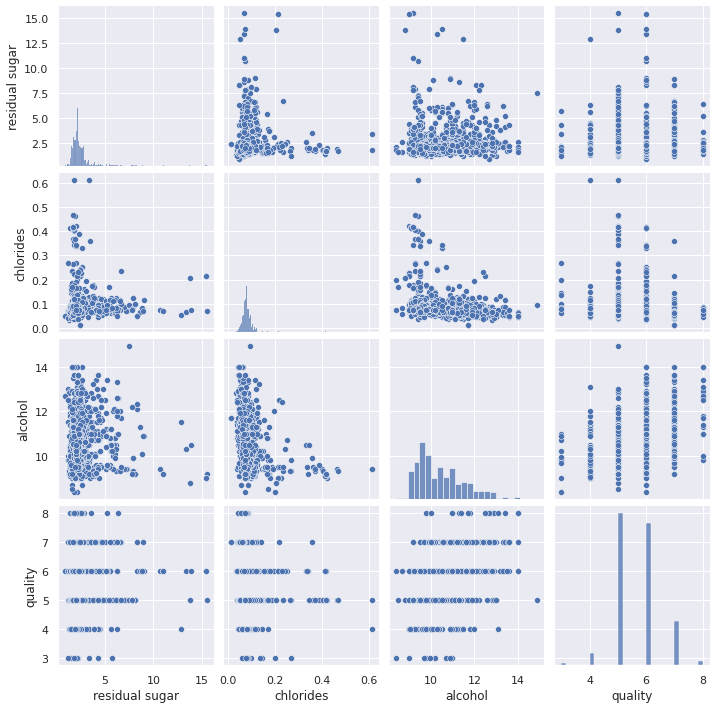

In [11]:
sns.pairplot(data_wine[['residual sugar', 'chlorides', 'alcohol', 'quality']])
plt.grid(True)
#クオリティが高いワインは糖の量やカロリーが低い
#なお糖の量が多いからと言ってカロリーが高いわけではない
#クオリティとアルコール度数に相関関係があるかどうか調べることにした

In [15]:
data_wine.groupby('quality')['alcohol'].mean()

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64

In [16]:
data_wine.groupby('quality')['chlorides'].mean()

quality
3    0.122500
4    0.090679
5    0.092736
6    0.084956
7    0.076588
8    0.068444
Name: chlorides, dtype: float64

In [17]:
data_wine.groupby('quality')['residual sugar'].mean()

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64

In [14]:
sp.stats.pearsonr(data_wine['quality'], data_wine['alcohol'])
#相関関数は0.476で、相関があるとは言えない

(0.476, 0.000)